**Employee Attrition EDA & Machine learning Modeling in Healthcare Company**

*I. Business Understanding and Research Objective*

> I.1. Background

Attrition is a condition or state where employee leave company because of several reason and can be categorized into two types: 
1. Non-Voluntary Attrition: Employee leaves company but it doesn’t come from him.
2. Voluntary Attrition: Employee leaves company and it comes from him

Non-Voluntary attrition can also called as Lay-off. When companies are conducting attrition, companies didn't find a replacement for his employees. This point can be differentiator between Attrition and Turnover

There are several reasons why employee attrition happen: 
1. Attrition is often called a hiring freeze or layoff and is seen as a less disruptive way to trim the workforce and reduce payroll than layoffs
2. Merger and Acquisition from several companies to adapt new system
3. Cancellation of project and technology enablement
4. Decreased operation and outsourcing options
5. Need to pay debts and lost of investor
6. Complex condition when Voluntary Attrition are combined with Non-Voluntary Attrition

Currently, healthcare company become one of industry sectors that experience attriton such as in Cedar Healthcare Center, they are need to layoff 3000 people, also there are several factors that create attrition in healthcare company:
1. Stressful nature of the healthcare work industry
2. High work hours and experience high burnout
3. Impact quality of care and the speed to care are often negatively impacted

> I.2. Project Scope
1. Dataset used is a dataset from Kaggle which provides employee attrition data for healthcare companies with 1600 datas
2. Project conducted for my learning purposes as an aspiring  data scientist, if you find any misleading information, don’t hesitate to contact me, we are going to focus on voluntary attrition since data gives more variable from employe perspective


> I.3. As-is condition and Research Goals 

Currently, there are lot of datas that tells about the importance of attrition, however there are still lack information about main factors from employee to leave their companies along with model to predict attrition in companies, based on background, project scopes, and as-is condition, we can define the research goals as: 
1. Define factors that create voluntary employee attrition
2. Giving Recommendation to prevent voluntary employee attrition
3. Develop a machine learning model to predict voluntary employee attrition









*II. CRISP DM Model Development including EDA*


> II.1. Data Understanding and Data Cleansing

This is a syntethic data that given from IBM Employee Attrition Data, the context is for healthcare company to check their worker performance at their company including the data thath contains infromation 




In [66]:
#Import Library List that usually used and will be used 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE 
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn import under_sampling, over_sampling
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler

In [67]:
#Import and run dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science Batch 13 - Fadly/1. Project - Project Fadly /Employee Attrition for Healtcare/watson_healthcare_modified.csv')

In [68]:
df

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [69]:
#Checking data type and its Non-Null data numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

> II.1. Data Understanding and Data Cleansing

Conduct to clear dataset from unwanted input that appear

In [70]:
#Seperating data into Numeric and Object data 
df_obj = df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]
df_int = df[['EmployeeID','Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked'
            ,'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','Shift','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]




In [71]:
#Lookin for information from Object Data
df_obj.describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1676,1676,1676,1676,1676,1676,1676,1676,1676
unique,2,3,3,6,2,5,3,1,2
top,No,Travel_Rarely,Maternity,Life Sciences,Male,Nurse,Married,Y,No
freq,1477,1184,796,697,998,822,777,1676,1200


In [72]:
#Looking for unique values from every object columns
columns = df_obj.columns
for i in columns:
  df_data_obj = df_obj[i].value_counts()
  print(df_data_obj)

No     1477
Yes     199
Name: Attrition, dtype: int64
Travel_Rarely        1184
Travel_Frequently     320
Non-Travel            172
Name: BusinessTravel, dtype: int64
Maternity     796
Cardiology    531
Neurology     349
Name: Department, dtype: int64
Life Sciences       697
Medical             524
Marketing           189
Technical Degree    149
Other                88
Human Resources      29
Name: EducationField, dtype: int64
Male      998
Female    678
Name: Gender, dtype: int64
Nurse             822
Other             534
Therapist         189
Administrative    115
Admin              16
Name: JobRole, dtype: int64
Married     777
Single      522
Divorced    377
Name: MaritalStatus, dtype: int64
Y    1676
Name: Over18, dtype: int64
No     1200
Yes     476
Name: OverTime, dtype: int64


In [73]:
#Looking for information from numeric data
df_int.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [74]:
#Looking datas for every numeric columns
columns = df_int.columns
for i in columns:
  df_data_int = df_int[i].value_counts()
  print(df_data_int)

1313919    1
1604086    1
1788553    1
1638427    1
1828789    1
          ..
1446447    1
1446990    1
1639147    1
1855799    1
1152329    1
Name: EmployeeID, Length: 1676, dtype: int64
35    88
34    85
29    82
31    82
36    81
32    68
38    68
40    64
30    63
33    62
28    59
27    59
37    57
42    52
39    47
26    46
45    45
41    43
46    38
43    37
44    36
50    33
25    30
49    29
24    29
47    28
55    25
53    25
48    23
52    21
54    20
51    20
22    18
23    17
58    17
56    15
21    14
20    13
19    10
59    10
18     8
60     5
57     4
Name: Age, dtype: int64
691     7
1329    7
1082    6
444     6
530     6
       ..
1126    1
974     1
905     1
1151    1
1102    1
Name: DailyRate, Length: 886, dtype: int64
2     241
1     239
10     99
3      96
7      95
9      93
8      89
5      76
6      72
4      69
16     38
24     34
29     33
23     33
11     33
25     29
15     29
26     28
18     28
19     27
28     27
20     27
17     23
14     22
13     2

In [75]:
#Checking Duplicated Columns
df.duplicated().sum()

0

In [76]:
#Checking Null Columns
df.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

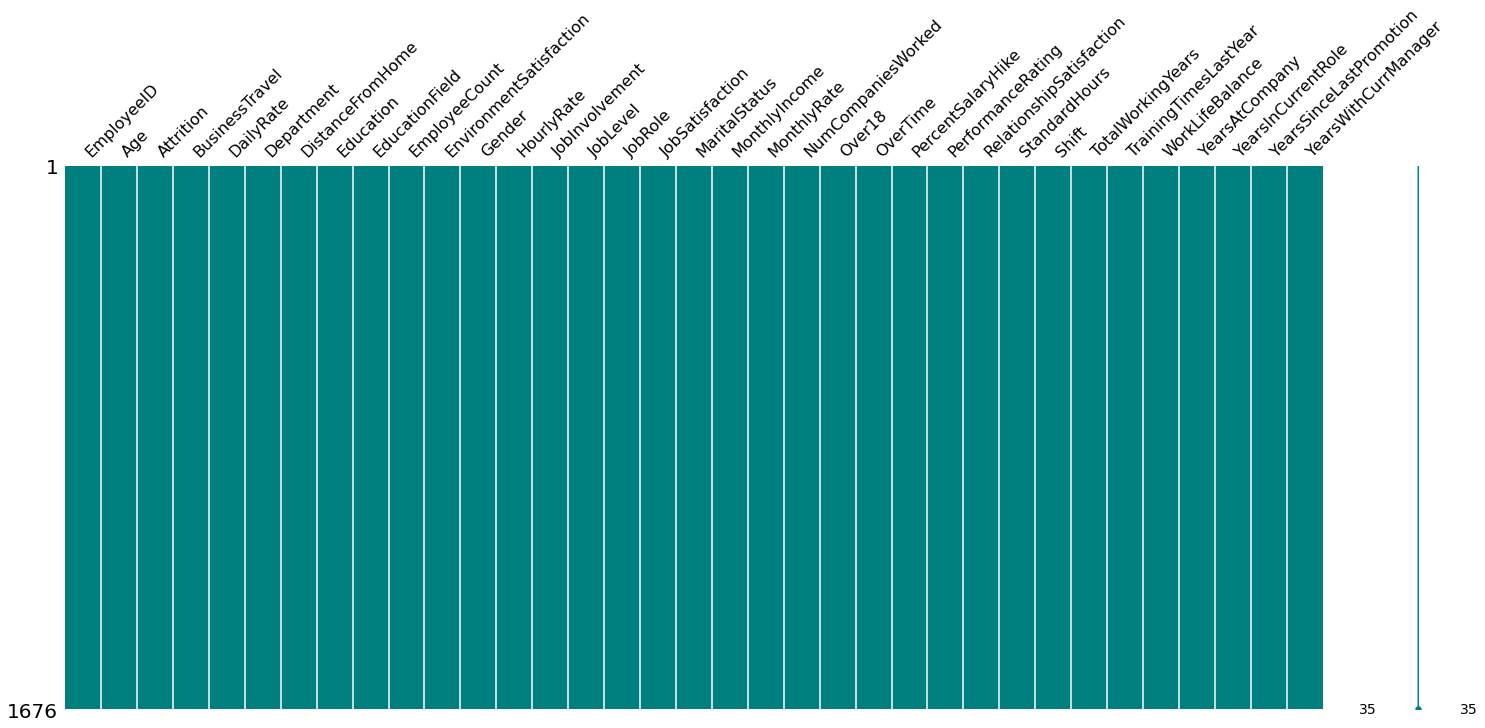

In [77]:
#By using MSNO Matrix we can make sure that there is no null data in the dataset    
import missingno as msno
fig = msno.matrix(df,color=(0,0.5,0.5))

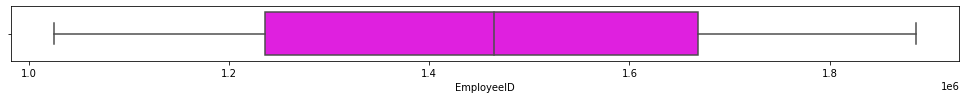

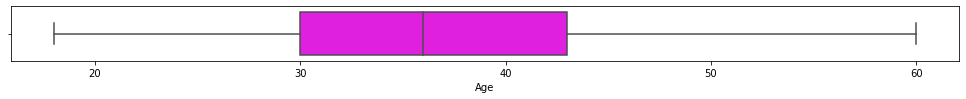

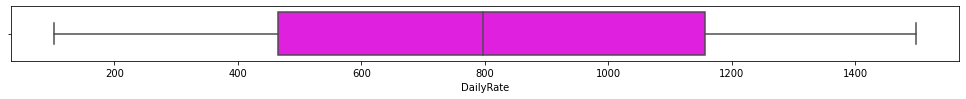

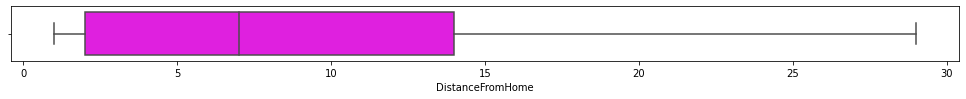

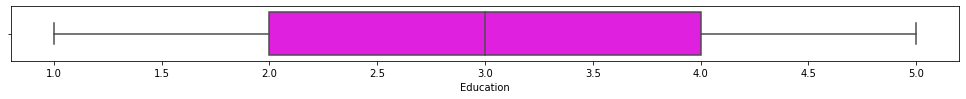

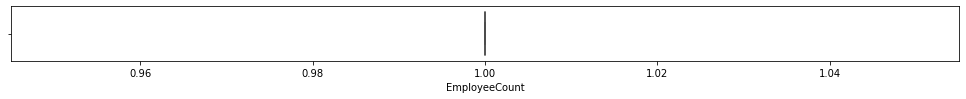

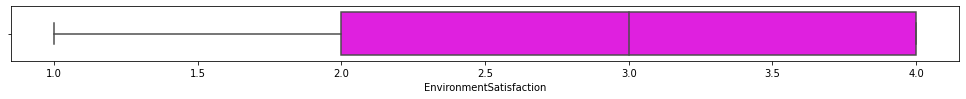

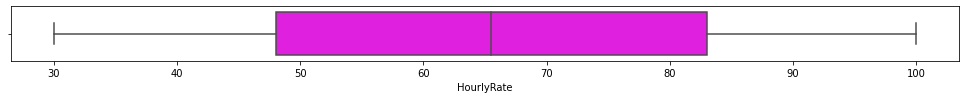

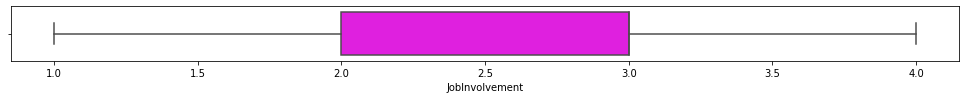

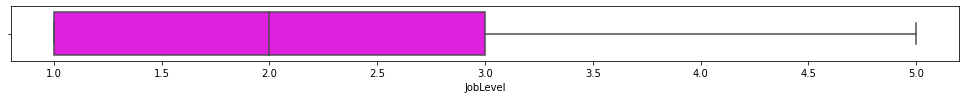

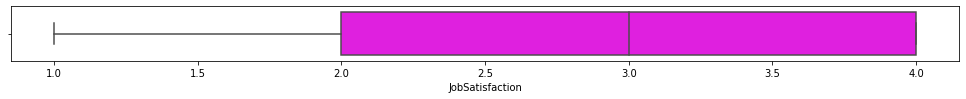

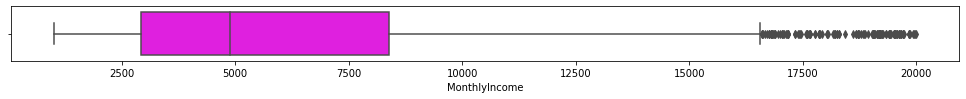

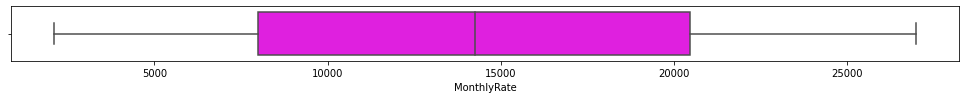

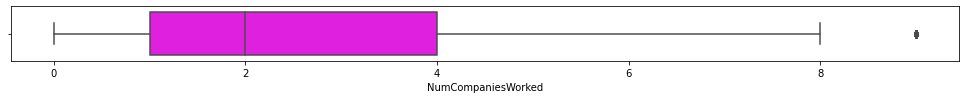

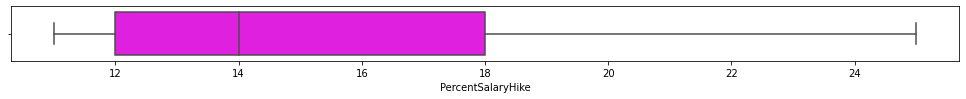

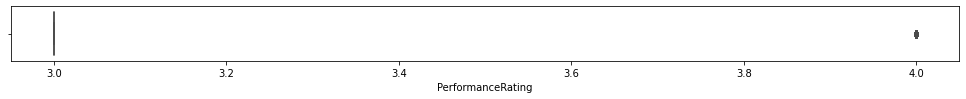

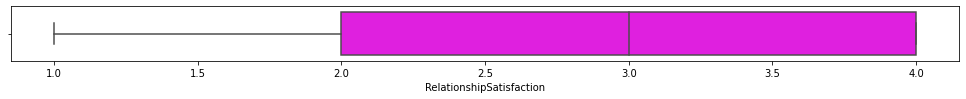

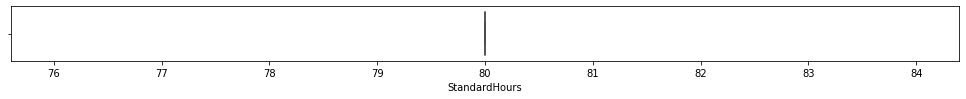

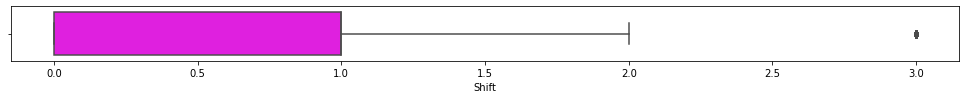

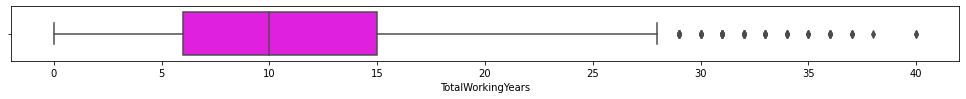

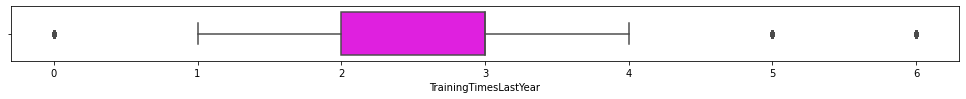

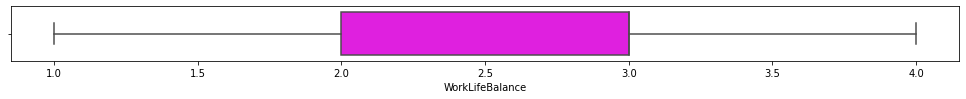

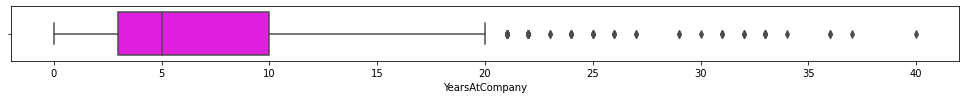

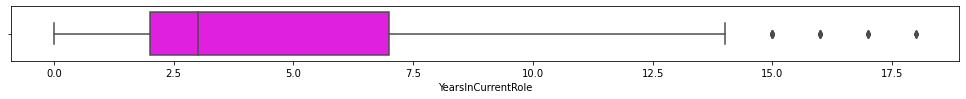

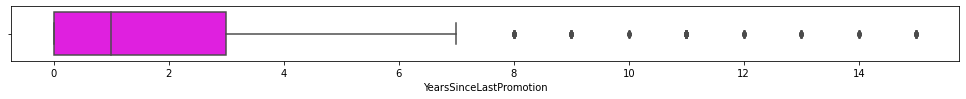

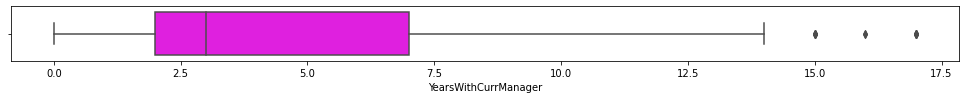

In [78]:
#Conducting Univariate analysis to see whether there is an outlier data or not
import matplotlib.pyplot as plt
import seaborn as sns
for column in df_int:
  plt.figure(figsize =(17,1))
  sns.boxplot(data = df_int, x= column, color='magenta')

Based on our analysis we can conclude that there isnt data that need to be cleansing in this current stage

> II.2. Exploratory Data Analysis



At this stage an analysis will be carried out on several factors that cause attrition in a company, where these factors are taken from several references contained in papers and websites, as for these factors are:

1. Raises 
2. Bonuses
3. Monitery Insentives 
4. Overtime frequently rate
5. Burnout
6. Working flexibility
7. Kondisi geografi 
8. Work from home flexibility/ Distance From home
9. Employee Development
10. Salary

Also, there are several factors that specialized for healthcare company which is:

1. Age 
2. Martial Status
3. Certification level or Educational Level
4. Job Involvement 

From each factor described, a graph plot will be carried out for each factor and its effect on attrition, where the factors that will be prioritized are the factors that are on the list that has been described.

Information above will only helps us to be more focused on several variables in conducting EDA for this dataset







In [79]:
#Categorize data based on Attrition and Non-Attrition
Attrition = df[df['Attrition']=='Yes']
Non_Attrition = df[df['Attrition']=='No']

In [80]:
#Defining the data environment for creating data visualization 
df_obj = df[['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']]
df_int = df[['EmployeeID','Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked'
            ,'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','Shift','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]


In [81]:
Attrition

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
14,1420391,28,Yes,Travel_Rarely,103,Maternity,24,3,Life Sciences,1,...,2,80,0,6,4,3,4,2,0,3
26,1142062,32,Yes,Travel_Frequently,1125,Maternity,16,1,Life Sciences,1,...,2,80,0,10,5,3,10,2,6,7
34,1884939,24,Yes,Travel_Rarely,813,Maternity,1,3,Medical,1,...,1,80,1,6,2,2,2,0,2,0
36,1058169,50,Yes,Travel_Rarely,869,Cardiology,3,2,Marketing,1,...,3,80,0,3,2,3,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667,1175959,28,Yes,Travel_Rarely,329,Neurology,24,3,Medical,1,...,3,80,3,1,3,3,1,1,0,0
1668,1655666,20,Yes,Travel_Frequently,871,Neurology,6,3,Life Sciences,1,...,2,80,0,1,5,3,1,0,1,0
1669,1602218,33,Yes,Travel_Rarely,1017,Maternity,25,3,Medical,1,...,2,80,0,5,0,3,2,2,2,2
1670,1336016,28,Yes,Travel_Rarely,654,Maternity,1,2,Life Sciences,1,...,4,80,0,10,4,3,7,7,3,7


In [82]:
Non_Attrition

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,1633361,32,No,Travel_Frequently,1005,Maternity,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1327800,34,No,Travel_Rarely,204,Cardiology,14,3,Technical Degree,1,...,4,80,2,8,3,3,8,2,0,6
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


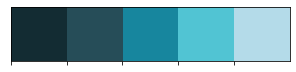

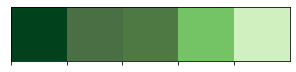

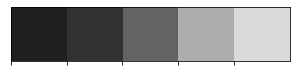

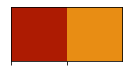

In [83]:
#Color Palette for Our Data Visualisation
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)
colors = ["#AD1B02","#E88D14"]
sns.palplot(colors)

In [84]:
#Checking information for number of samples in this dataset
import plotly.express as px
d= pd.DataFrame(df['Attrition'].value_counts())
fig = px.pie(d,values='Attrition',names=['No','Yes'],hole=0.4,opacity=0.6,
            color_discrete_sequence=colors,
             labels={'label':'Attrition','Attrition':'No. Of Samples'})

fig.add_annotation(text='Attrition',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many samples of Attrition in this data?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.5,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [85]:
#Visualization to compare age distribution for attrition and non attrition data
import plotly.express as px
fig = px.histogram(df, x="Age", marginal='box',color="Attrition",opacity=0.7, nbins = 12, color_discrete_sequence = colors, barmode='group',histfunc='count')
fig.update_layout(
    font_family='monospace',
    title=dict(text='Age Distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Age Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [86]:
#Visualization to compare Daily Rate for attrition and non attrition data
import plotly.express as px
fig = px.histogram(df, x="DailyRate", marginal='box',color="Attrition",opacity=0.7, nbins = 100, color_discrete_sequence = colors, barmode='group',histfunc='count')
fig.update_layout(
    font_family='monospace',
    title=dict(text='Daily Rate Distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Daily Rate Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [87]:
#Visualization to compare Employee Distance from Home for attrition and non attrition data
import plotly.express as px
fig = px.histogram(df, x="DistanceFromHome",color="Attrition", marginal="box")
fig.update_layout(
    font_family='monospace',
    title=dict(text='Distance From Home Distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Distance From Home Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [88]:
#Visualization to compare Eduational Distribution for attrition and non attrition data
import plotly.express as px

fig = px.histogram(df, x="Education",color="Attrition",marginal = 'box',opacity=0.7, color_discrete_sequence = colors, barmode='group',histfunc='count')
fig.update_layout(
    font_family='monospace',
    title=dict(text='Education distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Education Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [89]:
#Visualization to compare Environment Satisfaction distribution for attrition and non attrition data
import plotly.express as px
fig = px.histogram(df, x="EnvironmentSatisfaction", marginal='box',color="Attrition",opacity=0.7, color_discrete_sequence = colors, barmode='group',histfunc='count')
fig.update_layout(
    font_family='monospace',
    title=dict(text='Environment Satisfaction distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Environment Satisfaction Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [90]:
#Visualization to compare HourlyRate distribution for attrition and non attrition data
fig = px.histogram(df, x="HourlyRate", color="Attrition",nbins=100, color_discrete_sequence = colors, marginal="box")
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Hourly Rate distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Hourly Rate Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [91]:
#Visualization to compare Job Involvement Satisfaction distribution for attrition and non attrition data
fig = px.histogram(df, x="JobInvolvement", color="Attrition",nbins=4, color_discrete_sequence = colors, marginal="violin",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Job Involvement distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Job Involvement Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [92]:
#Visualization to compare Job Level distribution for attrition and non attrition data
fig = px.histogram(df, x="JobLevel", color="Attrition",nbins=5, color_discrete_sequence = colors, marginal="violin",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Job Level distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Job Level Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [93]:
#Visualization to compare Job Satisfaction distribution for attrition and non attrition data
fig = px.histogram(df, x="JobSatisfaction", color="Attrition",nbins=4, color_discrete_sequence = colors, marginal="violin",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Job Satisfaction distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Job Satisfaction Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [94]:
#Visualization to compare monthly income distribution for attrition and non attrition data
fig = px.histogram(df, x='MonthlyIncome', color="Attrition", color_discrete_sequence = colors, marginal="box",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Monthly Income distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Monthly Income Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [95]:
#Visualization to compare percent salary hike distribution for attrition and non attrition data
fig = px.histogram(df, x='PercentSalaryHike', color="Attrition", color_discrete_sequence = colors, marginal="violin",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Percent Salary Hike distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Percent Salary Hike Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [96]:
#Visualization to compare Performance Rating distribution for attrition and non attrition data
fig = px.histogram(df, x='PerformanceRating', color="Attrition",nbins=2, color_discrete_sequence = colors, marginal="violin",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Performance Rating distribution with Attrition Information',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Performance Rating Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [97]:
#Visualization to compare Relationship Satisfaction distribution for attrition and non attrition data
fig = px.histogram(df, x='RelationshipSatisfaction', color="Attrition",nbins=4, color_discrete_sequence = colors, marginal="box",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Relationship Satisfaction with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Relationship Satisfaction Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [98]:
##Visualization to compare Training Time Last Year distribution for attrition and non attrition data
fig = px.histogram(df, x='TrainingTimesLastYear', color="Attrition",nbins=10, color_discrete_sequence = colors, marginal="violin",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Training Times Last Year with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Training Times Last Year Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [99]:
##Visualization to compare Work Life Balance distribution for attrition and non attrition data
fig = px.histogram(df, x='WorkLifeBalance', color="Attrition",nbins=4, color_discrete_sequence = colors, marginal="violin",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Work Life Balance Distribution with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Work Life Balance Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [100]:
#Visualization to compare Years At Company distribution for attrition and non attrition data
fig = px.histogram(df, x='YearsAtCompany', color="Attrition",nbins=100, color_discrete_sequence = colors, marginal="box",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Years At Company distribution with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Years At Company Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [101]:
#Visualization to compare shift distribution for attrition and non attrition data
fig = px.histogram(df, x='Shift', color="Attrition",nbins=5, color_discrete_sequence = colors, marginal="violin",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Shift distribution with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Shift at company distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [102]:
#Years in Current Role Distribution 
fig = px.histogram(df, x='YearsInCurrentRole', color="Attrition",nbins=20, color_discrete_sequence = colors, marginal="box",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Years in Current Role for Attrition',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Years in Current Role Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [103]:
#Visualization to compare Years Since Last Promotion distribution for attrition and non attrition data
fig = px.histogram(df, x='YearsSinceLastPromotion', color="Attrition",nbins=20, color_discrete_sequence = colors, marginal="box",barmode = 'group')
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Years Since Last Promotion with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Years Since Last Promotion Distribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [104]:
#Visualization to compare Travel Intensity distribution for attrition and non attrition data
import plotly.express as px
fig = px.sunburst(df, path=['BusinessTravel','Attrition'],
                  color='Attrition',color_discrete_sequence= ["#AD1B02","#E88D14","#E669A2"])
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Travel Intensity with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='TravelDistribution',
    yaxis_title_text='Count',
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3
)
fig.show()

In [105]:
#Visualization to compare Department distribution for attrition and non attrition data
import plotly.express as px
import numpy as np
fig = px.treemap(df, path=[px.Constant('Department'), 'Department','Attrition'],
                  color='Attrition',color_discrete_sequence= ["#AD1B02","#E88D14","#E669A2"] )
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Departement Distribution with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [106]:
#Visualization to compare Educational Field distribution for attrition and non attrition data
import plotly.express as px
fig = px.sunburst(df, path=['EducationField','Attrition'],
                  color='Attrition',color_discrete_sequence= ["#AD1B02","#E88D14","#E669A2"])
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Educational Field Distribution with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [107]:
#Jurusan kuliah tidak menjadi alasan seseorang meinggalkan pekerjaannya

In [108]:
#Visualization to compare Gender distribution for attrition and non attrition data
import plotly.express as px
fig = px.sunburst(df, path=['Gender','Attrition'],
                  color='Attrition',color_discrete_sequence= ["#AD1B02","#E88D14","#E669A2"])
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Gender Distribution with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [109]:
#Visualization to compare Job Role distribution for attrition and non attrition data
import plotly.express as px
import numpy as np
fig = px.treemap(df, path=[px.Constant('JobRole'), 'JobRole','Attrition'],
                  color='Attrition',color_discrete_sequence= ["#AD1B02","#E88D14","#E669A2"] )
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Job Role Distribution with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [110]:
#Visualization to compare OverTime distribution for attrition and non attrition data
import plotly.express as px
fig = px.sunburst(df, path=['OverTime','Attrition'],
                  color='Attrition',color_discrete_sequence= ["#AD1B02","#E88D14","#E669A2"])
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Over Time Distribution with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [111]:
#Visualization to compare Marital Status distribution for attrition and non attrition data
import plotly.express as px
fig = px.sunburst(df, path=['MaritalStatus','Attrition'],
                  color='Attrition',color_discrete_sequence= ["#AD1B02","#E88D14","#E669A2"])
# Add title
fig.update_layout(
    font_family='monospace',
    title=dict(text='Marital Status Distribution with Attrition Information',x=0.49,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=1,y=1,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

**Based on our EDA we can gather several importance insight which are:**

1. The number of attritions in this healthcare industry is still quite low (11.9%) of all data.
2. Employees who  experience attrition have a younger average age of 29 years and those who survive at 36 years, indicating that they still want to seek some career opportunity
3. Lower salary, Lower Hourly rate, and the further a person lives from his office become a factor for someone leave their company
4. People with low job satisfaction rating (below 2.5/4) have a tendency to leave their jobs
5. Employees with a salary increase percentage below 15% have a tendency leave the company
6. People with a salary of less than 2500 (unit of money)/month  have a tendency to leave the company.
7. People with an average training time from the office of less than 2 hours per agreed time period are more likely to leave the company.
8. Employees who have worked longer in a an average 3 years at their current position have the possibility to stay in their jobs
9. Nurse is the job with the highest number of jobs in the hospital and has a higher number of attritions (52% from total attrition data)
10. People with average work shift below 2 have a tendency to leave their company
11. An unmarried person has a bigger tendency (25%) to leave the company




> II.3. Data Preprocessing




1. Encoding :  Encoding are conducting because we will create a machine learning model from dataset but there are still data that not in numeric type so we need to change it to numeric first

In [112]:
#Ordinal Encoding
le = preprocessing.LabelEncoder()
le.fit(df['Attrition'])
df['Attrition_le'] = le.transform(df['Attrition'])
Attrition_Label_Encoding = df[['Attrition','Attrition_le']]
Attrition_Label_Encoding.head()

,Attrition,Attrition_le
0,No,0
1,No,0
2,Yes,1
3,No,0
4,No,0


In [113]:
le = preprocessing.LabelEncoder()
le.fit(df['OverTime'])
df['OverTime_le'] = le.transform(df['OverTime'])
OverTime_Label_Encoding = df[['OverTime','OverTime_le']]
OverTime_Label_Encoding.head()

,OverTime,OverTime_le
0,Yes,1
1,No,0
2,Yes,1
3,Yes,1
4,No,0


In [114]:
le = preprocessing.LabelEncoder()
le.fit(df['Gender'])
df['Gender_le'] = le.transform(df['Gender'])
Gender_Label_Encoding = df[['Gender','Gender_le']]
Gender_Label_Encoding.head()

,Gender,Gender_le
0,Female,0
1,Male,1
2,Male,1
3,Female,0
4,Male,1


In [115]:
#Frequently Encoding
#Frequently Endcoding: Business Travel, Department, EducationField, JobRole, Maritatl Satus 
freq_et_bt = df['BusinessTravel'].value_counts().reset_index()
freq_et_bt.rename(columns={"index": "BusinessTravel", "BusinessTravel": "freq_BusinessTravel"}, inplace = True)
freq_et_bt['pct_BusinessTravel'] = round((freq_et_bt['freq_BusinessTravel']/freq_et_bt['freq_BusinessTravel'].sum())*100,2)
freq_et_bt

,BusinessTravel,freq_BusinessTravel,pct_BusinessTravel
0,Travel_Rarely,1184,70.64
1,Travel_Frequently,320,19.09
2,Non-Travel,172,10.26


In [116]:
#Educational Field 
freq_et_ef = df['EducationField'].value_counts().reset_index()
freq_et_ef.rename(columns={"index": "EducationField", "EducationField": "freq_EducationField"}, inplace = True)
freq_et_ef['pct_EducationField'] = round((freq_et_ef['freq_EducationField']/freq_et_ef['freq_EducationField'].sum())*100,2)
freq_et_ef

,EducationField,freq_EducationField,pct_EducationField
0,Life Sciences,697,41.59
1,Medical,524,31.26
2,Marketing,189,11.28
3,Technical Degree,149,8.89
4,Other,88,5.25
5,Human Resources,29,1.73


In [117]:
#Department
freq_et_dp = df['Department'].value_counts().reset_index()
freq_et_dp.rename(columns={"index": "Department", "Department": "freq_Department"}, inplace = True)
freq_et_dp['pct_Department'] = round((freq_et_dp['freq_Department']/freq_et_dp['freq_Department'].sum())*100,2)
freq_et_dp

,Department,freq_Department,pct_Department
0,Maternity,796,47.49
1,Cardiology,531,31.68
2,Neurology,349,20.82


In [118]:
#Frequently Endcoding: JobRole
freq_et_jr = df['JobRole'].value_counts().reset_index()
freq_et_jr.rename(columns={"index": "JobRole", "JobRole": "freq_JobRole"}, inplace = True)
freq_et_jr['pct_JobRole'] = round((freq_et_jr['freq_JobRole']/freq_et_jr['freq_JobRole'].sum())*100,2)
freq_et_jr

,JobRole,freq_JobRole,pct_JobRole
0,Nurse,822,49.05
1,Other,534,31.86
2,Therapist,189,11.28
3,Administrative,115,6.86
4,Admin,16,0.95


In [119]:
#Frequently Endcoding: MaritalStatus
freq_et_ms = df['MaritalStatus'].value_counts().reset_index()
freq_et_ms.rename(columns={"index": "MaritalStatus", "MaritalStatus": "freq_MaritalStatus"}, inplace = True)
freq_et_ms['pct_MaritalStatus'] = round((freq_et_ms['freq_MaritalStatus']/freq_et_ms['freq_MaritalStatus'].sum())*100,2)
freq_et_ms

,MaritalStatus,freq_MaritalStatus,pct_MaritalStatus
0,Married,777,46.36
1,Single,522,31.15
2,Divorced,377,22.49


In [120]:
#Merge the Frequency Encoding 
df = df.merge(freq_et_bt[['BusinessTravel','pct_BusinessTravel']], on='BusinessTravel', how='inner')
df = df.merge(freq_et_ef[['EducationField','pct_EducationField']], on='EducationField', how='inner')
df = df.merge(freq_et_dp[['Department','pct_Department']], on='Department', how='inner')
df = df.merge(freq_et_jr[['JobRole','pct_JobRole']], on='JobRole', how='inner')
df = df.merge(freq_et_ms[['MaritalStatus','pct_MaritalStatus']], on='MaritalStatus', how='inner')

In [121]:
df.drop(['EmployeeID','Attrition', 'Over18','EmployeeCount','OverTime','Gender','JobRole','StandardHours','BusinessTravel','EducationField','Department','MaritalStatus'], axis = 1, inplace = True)

In [122]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_le,OverTime_le,Gender_le,pct_BusinessTravel,pct_EducationField,pct_Department,pct_JobRole,pct_MaritalStatus
0,41,1102,1,2,2,94,3,2,4,5993,...,0,5,0,1,0,70.64,41.59,31.68,49.05,31.15
1,59,1435,25,3,1,99,3,3,1,7637,...,7,9,0,0,0,70.64,41.59,31.68,49.05,31.15
2,37,1189,3,3,3,87,3,3,4,7428,...,1,3,0,0,1,70.64,41.59,31.68,49.05,31.15
3,38,702,1,4,1,59,2,2,4,8686,...,0,7,0,0,0,70.64,41.59,31.68,49.05,31.15
4,27,1377,2,3,4,74,3,2,3,4478,...,0,4,0,1,1,70.64,41.59,31.68,49.05,31.15


2. Data Imbalance

Because values in target variable have big ratio gap 90:10, this process conduct because we need to make sure that our target variable are in the same amount, it is really important so that we can define our evaluation metrics

In [123]:
#Imbalance Data Checker
target = df['Attrition_le'].value_counts()
target

0    1477
1     199
Name: Attrition_le, dtype: int64

In [124]:
#Based on data above, we can see that the data are not balance, so we need to balancing it using SMOTE
from imblearn import under_sampling, over_sampling
columns = list(df)
df_numeric = df[columns]
df_numeric = df_numeric.dropna()
df_numeric.head()

X = df_numeric.drop(['Attrition_le'],axis=1)
y = df_numeric['Attrition_le']

# Overampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)
df_oversampling_smote = pd.concat([X_over_smote, y_over_smote], axis=1)
df_oversampling_smote.head(3)
x_sm = df_oversampling_smote.drop(['Attrition_le'],axis = 1)
y_sm = df_oversampling_smote['Attrition_le']
df_oversampling_smote['Attrition_le'].value_counts()

0    1477
1    1477
Name: Attrition_le, dtype: int64

3. Standardization

This process conduct because the data has a big range for evert variable so we need to conduct standarization to make sure that the data on the nearly same range and it will improve our model

In [125]:
#Standardization
scaler = StandardScaler()
scaler.fit(x_sm)
X_std = scaler.transform(x_sm)

new_df = pd.DataFrame(data = X_std, columns = list(X))
new_df.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,OverTime_le,Gender_le,pct_BusinessTravel,pct_EducationField,pct_Department,pct_JobRole,pct_MaritalStatus
0,0.763324,0.894525,-1.154064,-0.747163,-0.395222,1.613909,0.72336,0.241588,1.422791,0.137230,...,0.235030,-0.608783,0.576070,1.259639,-0.962778,0.753371,0.972239,-0.580801,0.873793,-0.498919
1,2.772605,1.788954,1.891138,0.289530,-1.329958,1.887482,0.72336,1.230022,-1.385399,0.525120,...,3.881130,1.876100,1.804965,-0.793878,-0.962778,0.753371,0.972239,-0.580801,0.873793,-0.498919
2,0.316817,1.128205,-0.900297,0.289530,0.539514,1.230908,0.72336,1.230022,1.422791,0.475808,...,-0.068812,-0.253800,-0.038377,-0.793878,1.038662,0.753371,0.972239,-0.580801,0.873793,-0.498919


4. Seperating data to Train and Test

This process conduct to make our model has good abaility to predict new data with outh experiencing data leakage, overfitting, and underfitting with ration (80:20)

In [126]:
#Seperating data into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(new_df, y_sm, test_size=0.20, random_state=42)


5. VIF Score calculation

VIF score are calculated because we need to check which feature that give impact to our target variable and which features that correlated on by other so that we can reduce it to make our model robust and have no bias

In [127]:
#VIF score 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant
#VIF score early diagnosis 
X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Age,2.394642
2,DailyRate,1.055548
3,DistanceFromHome,1.070711
4,Education,1.116903
5,EnvironmentSatisfaction,1.090511
6,HourlyRate,1.026285
7,JobInvolvement,1.164128
8,JobLevel,11.458614
9,JobSatisfaction,1.074684
10,MonthlyIncome,11.420875


There are several variable that has VIF score bigger than 4 so that we need to check the correlation heatmap and takeout parameter with correlation bigger than 0.8

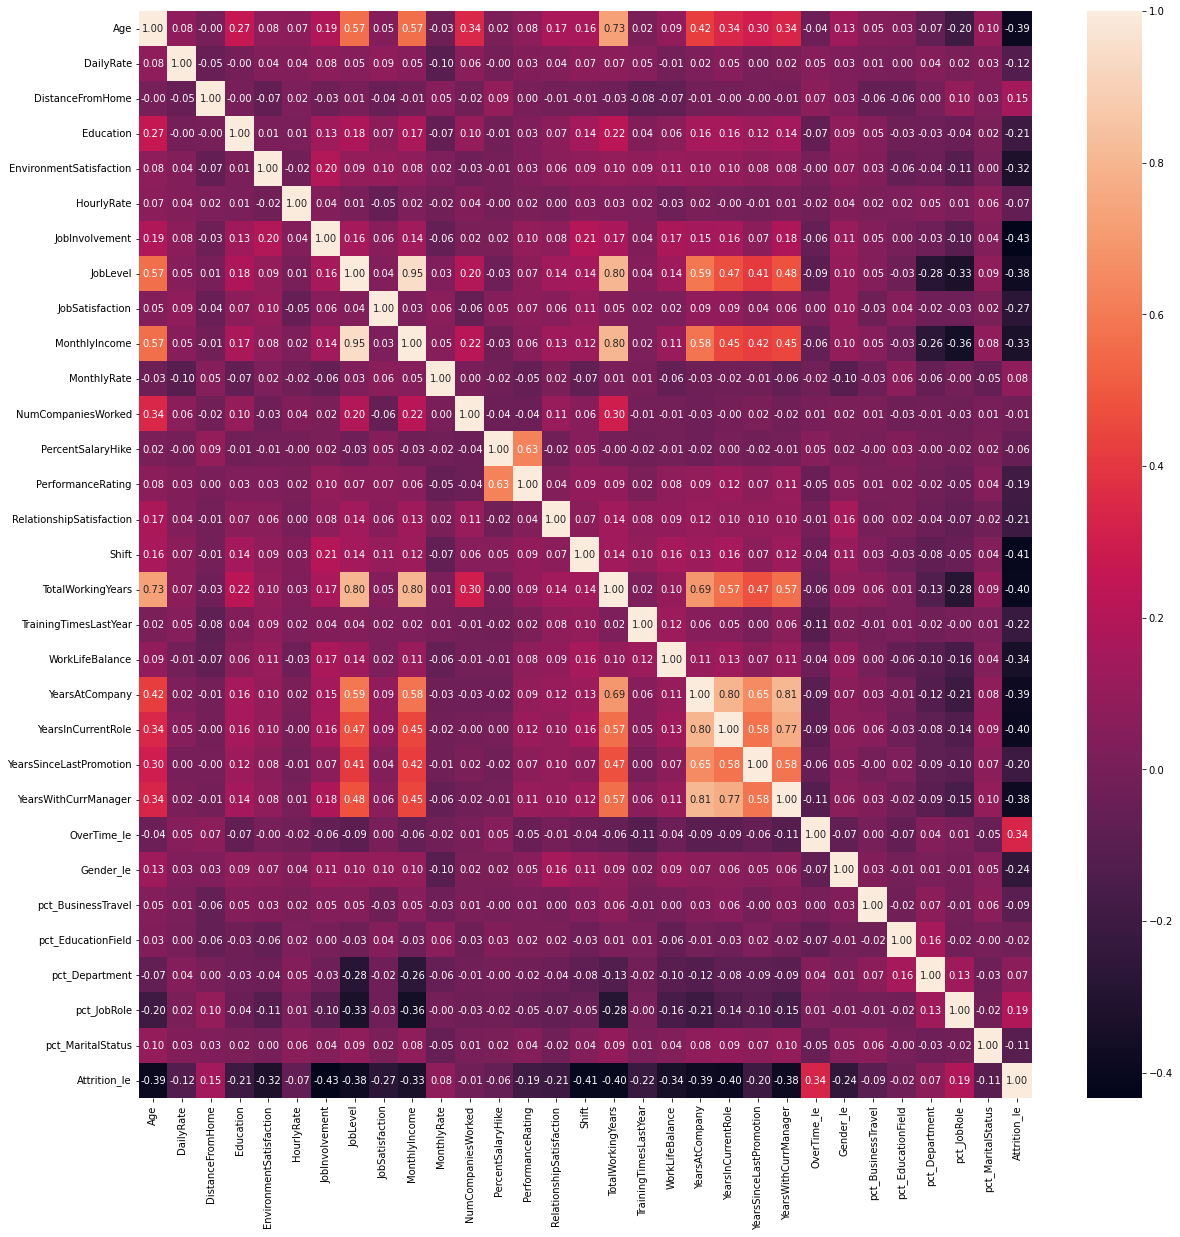

In [128]:
df_new = pd.concat([X_train, y_train], axis = 1)
corr = df_new.corr()

plt.figure(figsize =(20,20))
sns.heatmap(corr, annot = True, fmt='.2f')
plt.show()

There are several parameter with higher corelation which are: 

> Group One
1. YearsCurrRole = YearsAtCompany => 0.81
2. YearsCurrManager = YearsAtCompnay => 0.80
3. YearsCurrRole = YearsAtCompnay => 0.77
4. Every features has same number of correlation with target variables (Attrition_le) at 0.4 so we can select one of the variable without considering anything else


> Group Two
1. JobLevel and Total Working Years => 0.81
2. Job Level and Monthly Income => 0.95
3. Monthly Income and Total Working Years => 0.80
4. Job Level has the biggest correlation value with attrition = -0.39, so we only take Job Level




In [129]:
#Drop data which has big correlation
X_train = X_train.drop(columns=['YearsAtCompany','YearsWithCurrManager','TotalWorkingYears','MonthlyIncome'])
X_test = X_test.drop(columns=['YearsAtCompany','YearsWithCurrManager','TotalWorkingYears','MonthlyIncome'])

In [130]:
#Checking the VIF Score Again 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,Age,1.789632
2,DailyRate,1.051502
3,DistanceFromHome,1.062900
4,Education,1.116064
5,EnvironmentSatisfaction,1.087823
6,HourlyRate,1.023511
7,JobInvolvement,1.153146
8,JobLevel,2.051656
9,JobSatisfaction,1.069568
10,MonthlyRate,1.061577


VIF Score already cleared and data ready to be modeled



> II.4. Modelling 



1. Based Line Model development to choose the best model in our dataset

In [131]:
# Modelling Libraries
filterwarnings('ignore')
models =[("LR", LogisticRegression(max_iter=1000)),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),
        ("SGDC", SGDClassifier()),
        ("Ridge", RidgeClassifier()),('RF',RandomForestClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results,average='macro')
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)
finalResults

[('RF', 0.9547010418587498),
 ('Ridge', 0.8968392120934494),
 ('DTC', 0.8934551076500229),
 ('LR', 0.8877452778287181),
 ('KNN', 0.8771544017735822),
 ('SGDC', 0.8749570535284821),
 ('PAC', 0.8272356784963864)]

Based on Baseline Modeling, the best accuracy is given by RF, so we will develop a model using random forest

2. Modelling

In [132]:
rf_clf = RandomForestClassifier(random_state=42)

3. Hyperparameter tunning to imporve the modelling quality

In [133]:
from sklearn.model_selection import GridSearchCV
grid_param = {'n_estimators':[90,100,115,130],
              'criterion': ['gini','entropy'],
              'max_depth': range(2,20,1),
              'max_features':['auto','log2']}
              

In [134]:
grid_search = GridSearchCV(estimator=rf_clf, param_grid = grid_param,cv = 5, n_jobs = -1, verbose = 3)

In [135]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

4. Features Importance Analysis to check what are features that give importance impact to target variable and our model

In [136]:
# create the classifier with n_estimators = 100
#clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
#clf.fit(X_train, y_train)
feature_scores = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores 

Shift                       0.090638
pct_MaritalStatus           0.084706
JobInvolvement              0.073821
Age                         0.070995
JobLevel                    0.058409
OverTime_le                 0.056538
YearsInCurrentRole          0.055488
JobSatisfaction             0.041214
EnvironmentSatisfaction     0.039338
pct_JobRole                 0.039189
WorkLifeBalance             0.039087
DistanceFromHome            0.037107
pct_BusinessTravel          0.034313
DailyRate                   0.032658
MonthlyRate                 0.032418
HourlyRate                  0.029301
RelationshipSatisfaction    0.028351
pct_Department              0.026355
TrainingTimesLastYear       0.024593
pct_EducationField          0.022487
Education                   0.018578
NumCompaniesWorked          0.018499
PercentSalaryHike           0.015151
Gender_le                   0.014648
YearsSinceLastPromotion     0.012572
PerformanceRating           0.003545
dtype: float64

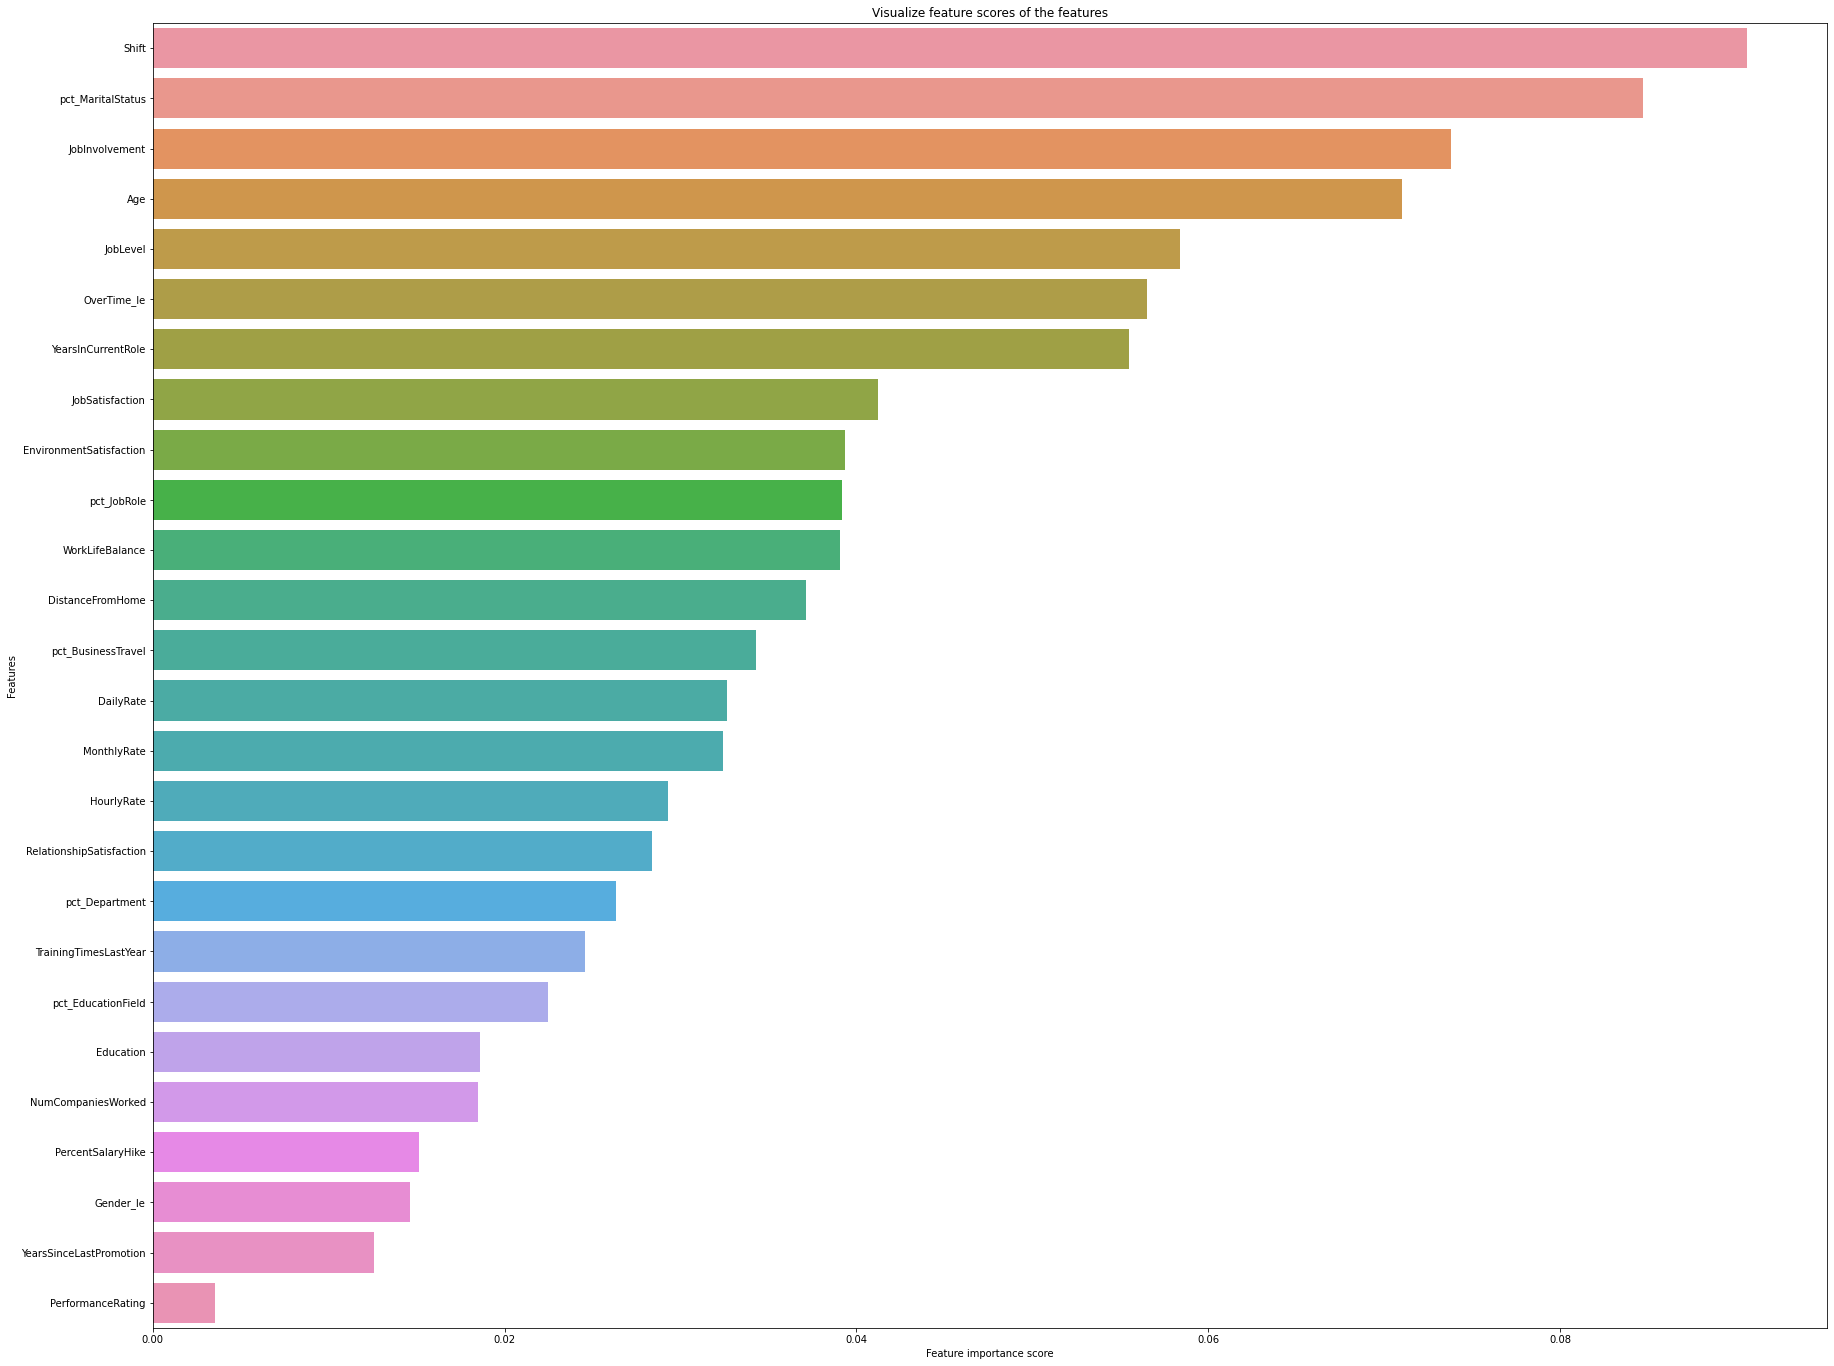

In [137]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

5. Evaluation to check our model quality

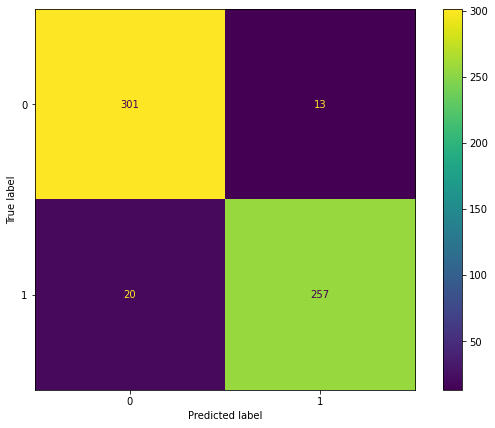

In [138]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels= grid_search.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels= grid_search.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [139]:
# classification report
from sklearn.metrics import classification_report
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       314
           1       0.95      0.93      0.94       277

    accuracy                           0.94       591
   macro avg       0.94      0.94      0.94       591
weighted avg       0.94      0.94      0.94       591



6. Testing result from test data

In [141]:
#https://towardsdatascience.com/when-logistic-regression-simply-doesnt-work-8cd8f2f9d997

pd.DataFrame({'Shift': X_test['Shift'], 
              'pct_MaritalStatus': X_test['pct_MaritalStatus'], 
              'Ground Truth': y_test, 
              'Prediction': grid_search.predict(X_test)})[:10]

,Shift,pct_MaritalStatus,Ground Truth,Prediction
2745,-0.691986,-0.498919,1,1
1255,1.847301,1.243120,0,0
174,-0.691986,-0.498919,1,1
2844,-0.691986,-0.092645,1,1
857,0.577658,1.243120,0,0
256,-0.691986,-0.498919,0,0
1898,0.577658,-0.841213,1,1
430,-0.691986,-0.498919,0,0
1461,0.577658,-1.490770,0,0
2882,-0.691986,-0.498919,1,1


As seen, from 10 random samples in dataset, Prediction columns have same value with Ground Truth, shows that model can predict data accurately

*III. Summary and Recommendation*


> III.1. Summary
1. Based on feature importances and EDA there are several factor that give big impact to Employee Attrition at Hospital you can refer EDA and Feature Importance Analysis
2. Recommendation already given in Recommendation section based on EDA and Feature Importance Analysis
3. Model already develop using Random Forest Regressor with HP tuning by Accuracy around 95%

> III.2. Recommendation
1. Employee with younger age should be given several method to keep them stay at this company, such as: Job enlargement, Job Enrichment, Job Involvement, using Mentor and Buddies system to make them can explore more opportunity jobs at your company.
2. Defining KPI and clear job role, including the segmentation of work shifts that must be more regular to every employee to make them still performing and after that you should define clear job career process for every division and team.
3. The payroll system must be improved on a certain basis such as hourly payment system, KPI based salary, and structural based salary. 
4. Creating good work environment to increase job satisfaction index
5. Creating competency dictionary for every job role with change management and improvement management process and executing the process by creating several sharing session, coaching session and training for employee.
6. Should conduct deep dive analysis for several features that still gives not clear information






